In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])


In [6]:
df.dtypes


Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = (
    df
    .groupby('Дата', as_index=False)
    .agg({'Количество': 'sum'})
)


Вывести несколько первых строк сгруппированных данных

In [8]:
grouped_df.head()


,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

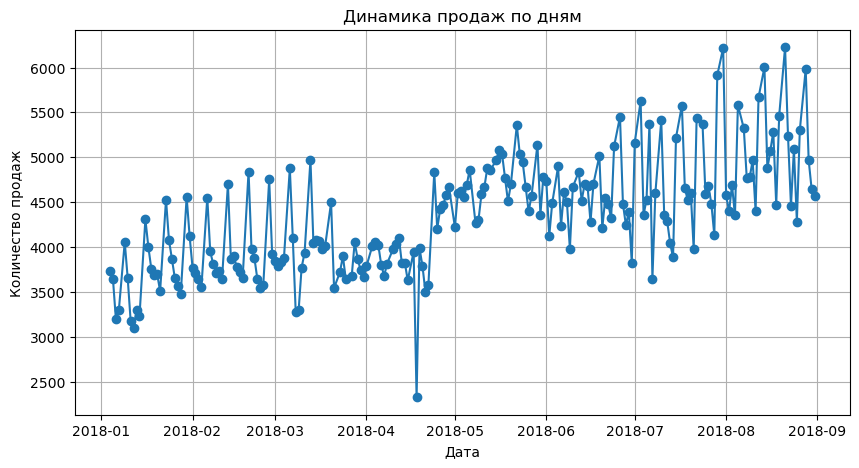

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике показана динамика общего объёма продаж по дням.
По оси X указаны даты, по оси Y — суммарное количество проданных товаров.
Объём продаж меняется неравномерно: в одни дни он выше, в другие — ниже.
Резких выбросов или аномалий на графике не наблюдается.
График позволяет оценить общую картину продаж и выявить дни с повышенной и пониженной активностью.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
df.sort_values(by='Количество', ascending=False).head(1)


,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df_filtered = df[df['Склад'] == 3]

df_filtered = df_filtered[df_filtered['Дата'].dt.month.isin([6, 7, 8])]

df_filtered = df_filtered[df_filtered['Дата'].dt.weekday == 2]

product_sales = (
    df_filtered
    .groupby('Номенклатура', as_index=False)
    .agg({'Количество': 'sum'})
)

top_product = product_sales.sort_values(
    by='Количество', ascending=False
).head(1)

top_product


,Номенклатура,Количество
1,product_1,2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [13]:
import os
os.listdir()


['.bash_history',
 '.conda',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.Origin',
 '.QtWebEngineProcess',
 '.viminfo',
 '146.png',
 '3D Objects',
 '500_Person_Gender_Height_Weight_Index.csv',
 'Academica Pyton',
 'ansel',
 'API.ipynb',
 'AppData',
 'Application Data',
 'Case Study.ipynb',
 'CausalInferenceHW.ipynb',
 'coffee_sales_data.csv',
 'compare_df.csv',
 'Contacts',
 'Cookies',
 'CSE_student_performances.csv',
 'data.csv',
 'Desktop',
 'DID_test.csv',
 'Documents',
 'Downloads',
 'dsstatistics1.ipynb',
 'dsstatistics2.ipynb',
 'DS_Statistics_3.ipynb',
 'Favorites',
 'file.txt',
 'file2.txt',
 'hw13.ipynb',
 'HW14.ipynb',
 'hw8.ipynb',
 'IntelGraphicsProfiles',
 'Intro to Jupyter.ipynb',
 'issledovanie-last-updated.ipynb',
 'Links',
 'listings.csv',
 'Local Settings',
 'masinnoe-obucenie (1).ipynb',
 'math_operations.py',
 'Matplotlib.ipynb',
 'Microsoft',
 'Mini project 1.ipynb',
 'Mini project ML (1).ipynb',
 'Mini project ML5.ipynb',
 'mi

In [14]:
import os
os.chdir(r'C:\Users\Gulnur\Desktop')
os.listdir()


['35188.27.12.2025.02.01.2026.1.0.0.ru.ansi.00000000 (1).csv',
 '35188.27.12.2025.02.01.2026.1.0.0.ru.ansi.00000000.csv',
 'Assignment.xlsx финальный проект.xlsx',
 'Daniyar - Chrome.lnk',
 'desktop.ini',
 'exsel',
 'hw g.docx',
 'hw git.docx',
 'images.jpg',
 'images.jpg 5.jpg',
 'masinnoe-obucenie.ipynb',
 'mini-project-questions (1).ipynb',
 'mini-project-questions (2).ipynb',
 'mini-project-questions.ipynb',
 'MySQL Workbench 8.0 CE.lnk',
 'Power BI',
 'python',
 'Roblox Studio.lnk',
 'sf_events.csv',
 'sql',
 'Telegram.lnk',
 'user_activity.csv',
 'Zoom Workplace.lnk',
 '~$111.docx',
 '~$Doc1.docx',
 '~$pk.docx',
 '~$НАШ БЮДЖЕТ.xlsx',
 'Адиль.docx',
 'Блок Power BI.docx',
 'гидхаб.docx',
 'Дамиль',
 'Данные для тестового задания (1).xlsx',
 'Задание для собеседования.docx.lnk',
 'мини проект1.docx',
 'мини проекты',
 'НАШ БЮДЖЕТ.xlsx',
 'статистика конспект',
 'Тестирование Аналитик .xlsx финальный проект.xlsx',
 'Тестовое задание Финальный проект.docx',
 'Финальный проект Power B

In [15]:
weather = pd.read_csv(
    '35188.27.12.2025.02.01.2026.1.0.0.ru.ansi.00000000.csv',
    sep=';',
    encoding='cp1251',
    skiprows=6,
    engine='python'
)

weather.head()


,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,02.01.2026 23:00,-5.4,735.0,768.3,-0.7,85,"Ветер, дующий с востока",1,NaN,NaN,...,NaN,NaN,NaN,-7.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,02.01.2026 20:00,-6.6,735.7,769.3,-0.5,81,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,NaN,NaN,NaN,-9.4,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,02.01.2026 17:00,-6.9,736.2,769.7,-0.3,78,"Ветер, дующий с юга",1,NaN,NaN,...,"Высококучевые просвечивающие, полосами, либо о...",NaN,NaN,-10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,02.01.2026 14:00,-6.5,736.5,770.0,-1.5,78,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-9.7,NaN,NaN,NaN,NaN,NaN,NaN
4,02.01.2026 11:00,-9.6,738.0,772.0,-0.9,79,"Ветер, дующий с юго-востока",1,NaN,NaN,...,NaN,NaN,4.0,-12.6,Следы осадков,12.0,NaN,NaN,NaN,NaN


In [16]:
weather.columns


Index(['Местное время в Астане', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff', 'ff10',
       'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch',
       'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [27]:
weather['T'] = (
    weather['T']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

weather['T'] = pd.to_numeric(weather['T'], errors='coerce')


In [35]:
weather['Дата'] = pd.to_datetime(
    weather['Местное время в Астане'],
    dayfirst=True,
    errors='coerce'
).dt.date

weather[['Местное время в Астане', 'Дата']].head()


,Местное время в Астане,Дата
0,02.01.2026 23:00,2026-01-02
1,02.01.2026 20:00,2026-01-02
2,02.01.2026 17:00,2026-01-02
3,02.01.2026 14:00,2026-01-02
4,02.01.2026 11:00,2026-01-02


In [29]:
daily_temp = (
    weather
    .groupby('Дата', as_index=False)
    .agg(T=('T', 'mean'))
)

daily_temp.head()


,Дата,T
0,2025-12-27,-20.7875
1,2025-12-28,-16.4250
2,2025-12-29,-6.8375
3,2025-12-30,-0.7200
4,2025-12-31,-5.7125


In [30]:
grouped_df['Дата'] = grouped_df['Дата'].dt.date
grouped_df.head()


,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [31]:
merged_df = grouped_df.merge(
    daily_temp,
    on='Дата',
    how='left'
)

merged_df.head()


,Дата,Количество,T
0,2018-01-04,3734,NaN
1,2018-01-05,3643,NaN
2,2018-01-06,3193,NaN
3,2018-01-07,3298,NaN
4,2018-01-09,4055,NaN


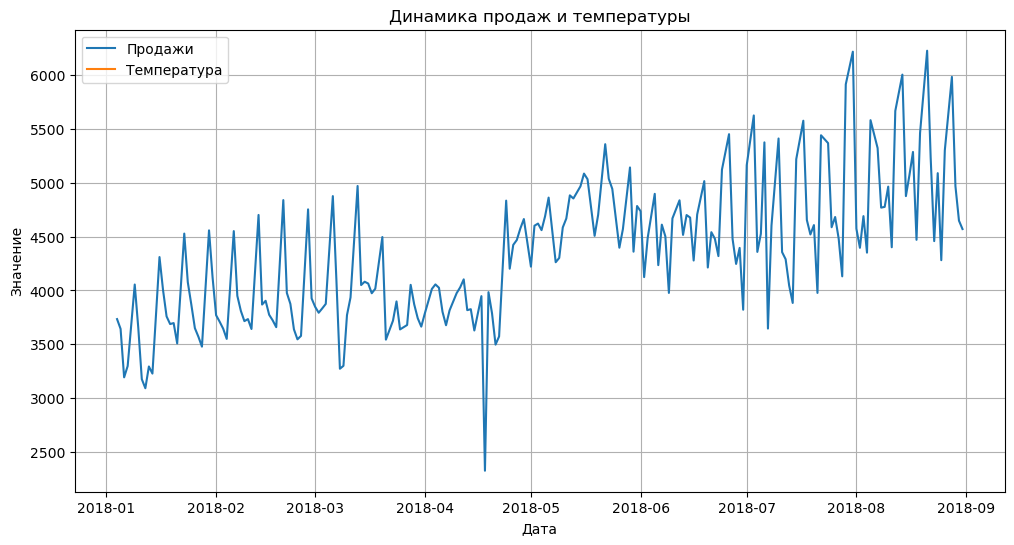

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(merged_df['Дата'], merged_df['Количество'], label='Продажи')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура')

plt.title('Динамика продаж и температуры')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()


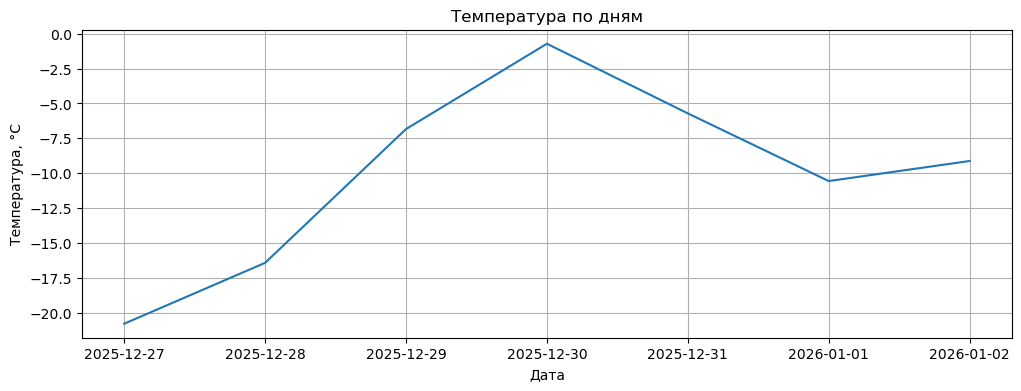

In [33]:
plt.figure(figsize=(12,4))
plt.plot(daily_temp['Дата'], daily_temp['T'])
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура, °C')
plt.grid(True)
plt.show()


In [34]:
merged_df[['Количество', 'T']].corr()


,Количество,T
Количество,1.0,NaN
T,NaN,NaN


Связь между температурой и продажами слабая. Это значит, что изменения температуры почти не влияют на то, сколько товаров продаётся — на продажи сильнее влияют другие факторы.